## 필요한 모듈 임포트

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False

## train, test 데이터 가져오기

In [7]:
train = pd.read_csv('tangerine/train.csv')
test = pd.read_csv('tangerine/test.csv')

In [8]:
train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


## 데이터 전처리

#### 필요없는 ID 피처 삭제

In [9]:
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

#### 새순과 엽록소 피처들을 하나로 모은 뒤 평균값을 추가

In [10]:
s_train = train.filter(regex='새순', axis=1)
y_train = train.filter(regex='엽록소', axis=1)
s_test = test.filter(regex='새순', axis=1)
y_test = test.filter(regex='엽록소', axis=1)

In [11]:
train['Mean_s'] = s_train.mean(axis=1)
train['Mean_y'] = y_train.mean(axis=1)
test['Mean_s'] = s_test.mean(axis=1)
test['Mean_y'] = y_test.mean(axis=1)

#### '새순' 과 '엽록소' 가 들어간 피처들 제거

In [12]:
train.drop(train.filter(regex='새순'), axis=1, inplace=True)
train.drop(train.filter(regex='엽록소'), axis=1, inplace=True)
test.drop(test.filter(regex='새순'), axis=1, inplace=True)
test.drop(test.filter(regex='엽록소'), axis=1, inplace=True)

## 상관계수 히트맵으로 확인

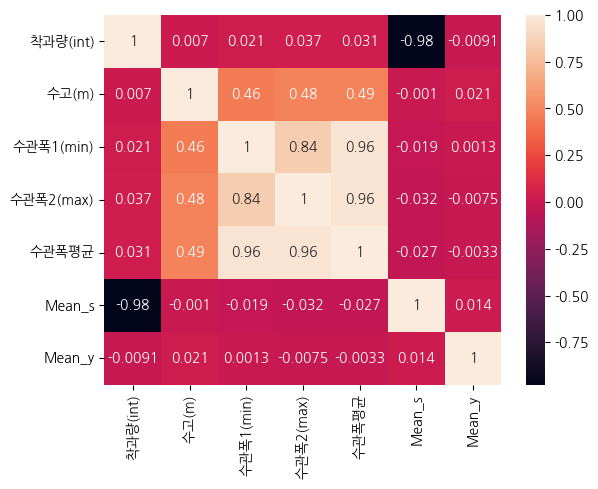

In [13]:
sns.heatmap(train.corr(), annot=True)
plt.show()

## Randomforest Regressor을 사용해 모델 생성

In [14]:
from sklearn.ensemble import RandomForestRegressor

train_x = train.drop('착과량(int)', axis=1)
train_y = train['착과량(int)']

rf = RandomForestRegressor()
rf.fit(train_x, train_y)

pred_rf = rf.predict(test)
print(pred_rf)

[329.22 751.48 108.73 ... 391.9  258.8   81.6 ]


## XGBRegressor을 사용해 모델 생성

In [15]:
from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler

# params = {
#     'n_estimators':[1,5,10,50,100,200],
#     'max_depth':[1,5,10],
#     'gamma':[0.0001, 0.001, 0.01, 0.1, 1]
# }

xg = XGBRegressor()
xg.fit(train_x, train_y)
pred_xg = xg.predict(test)
print(pred_xg)

[365.00934 747.9306  118.35336 ... 390.65118 250.70367  76.75244]


## Randomforest와 XGBoost 예측 결과 제출

In [19]:
preds = {'Randomforest':pred_rf, 'XGBoost':pred_xg}

for s in ['Randomforest', 'XGBoost']:
    sample_submission = pd.read_csv('tangerine/sample_submission.csv')

    sample_submission['착과량(int)'] = preds[s]
    sample_submission.to_csv('tangerine/'+s+'_submit.csv', index=False)

## 예측 결과

Randomforest

![Alt text](rf.PNG)

XGBoost

![Alt text](xg.PNG)

결과 : Randomforest의 성능이 조금 더 좋은것을 알 수 있음  
  
Randomforest 하이퍼 파라미터 튜닝을 이용하여 정확도 상승 시도

## GridsearchCV 교차검증 알고리즘 설정

In [ ]:
from sklearn.model_selection import GridSearchCV

